Python scripts to create figures fot LaTeX

In [1]:
from importlib import reload
import sys

In [2]:
sys.path.append('/home/sejin8642/gd/ftnmr/ft')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

importing and instantiating fid module

In [4]:
import fid

In [85]:
s = fid.fid(shift=0.03, nsp=32, total_t=16690)

In [86]:
s.w

0.0120384984348

In [87]:
s.total_t

16690

In [89]:
s.t.shape

(1024,)

In [102]:
s.SR

0.06131156906567888

In [103]:
dt = 1/s.SR

In [105]:
1/dt

0.06131156906567889

In [106]:
s.SR

0.06131156906567888

In [107]:
dt

16.310135513393377

In [110]:
scipy.fft.fftfreq([1, 2, 3, 4])

ValueError: n should be an integer

In [90]:
x = s.t

In [92]:
y = s.signal.real

In [93]:
z = s.signal.imag

Plotting s vs. t for LaTeX

In [94]:
# default plt style to fix jupyter notebook margin issue when plotting
plt.style.use('default')

In [95]:
def graph(x, y, xlabel='x', ylabel='y', save=False, filename='figure.eps'):
    # LaTeX font with size 9
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": 'serif',
        "font.size": 9})
    
    # plots y vs. x in black line with linesize 2 with the given axes
    fig = plt.figure(figsize=(6,4), dpi=500)
    ax = fig.add_subplot(111)
    
    # minimums and maximums of x and y 
    xmin, xmax, ymin, ymax = min(x), max(x), min(y), max(y)
    
    # reset minimum and maximum of y if y-range does not contain 0
    if 0 < ymin: ymin = -0.1*ymax
    if ymax < 0: ymax = -0.1*ymin
    
    # configures plot axes, labels and their positions with arrow axis tips
    if (xmin <= 0) and (0 <= xmax):
        ax.spines['left'].set_position(('data', 0)) 
        ax.yaxis.set_label_coords(-xmin/(xmax - xmin), 1.02)
        ax.set_ylabel(ylabel, rotation=0)
        ax.plot(0, 1, "^k", markersize=3, transform=ax.get_xaxis_transform(), clip_on=False)
    else:
        ax.spines['left'].set_visible(False)
        ax.set_ylabel.set_visible(False)
    
    ax.spines['bottom'].set_position(('data', 0)) 
    ax.xaxis.set_label_coords(1.02, -ymin/(ymax - ymin) + 0.02)
    ax.set_xlabel(xlabel)
    ax.plot(1, 0, ">k", markersize=3, transform=ax.get_yaxis_transform(), clip_on=False)

    # plots y vs. x in black line with linesize 2 with the given axes
    plt.plot(x, y, 'k-', linewidth=.5)
    plt.axis([xmin, xmax, 1.1*ymin, 1.1*ymax])

    # change the spine linewidth
    plt.rcParams['axes.linewidth'] = 0.2

    # deletes top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # changes the size of ticks (both major and minor) to zero if ticks==False
    ax.tick_params(axis=u'both', which=u'both', length=0)

    # no tick labels
    plt.xticks([])
    plt.yticks([])

    # save the figure as eps vector image if save==True
    if (save == True): 
        plt.savefig(filename, format='eps', transparent=True)
    
    # show the plot
    plt.show()

In [169]:
%matplotlib inline
plt.style.use('default')

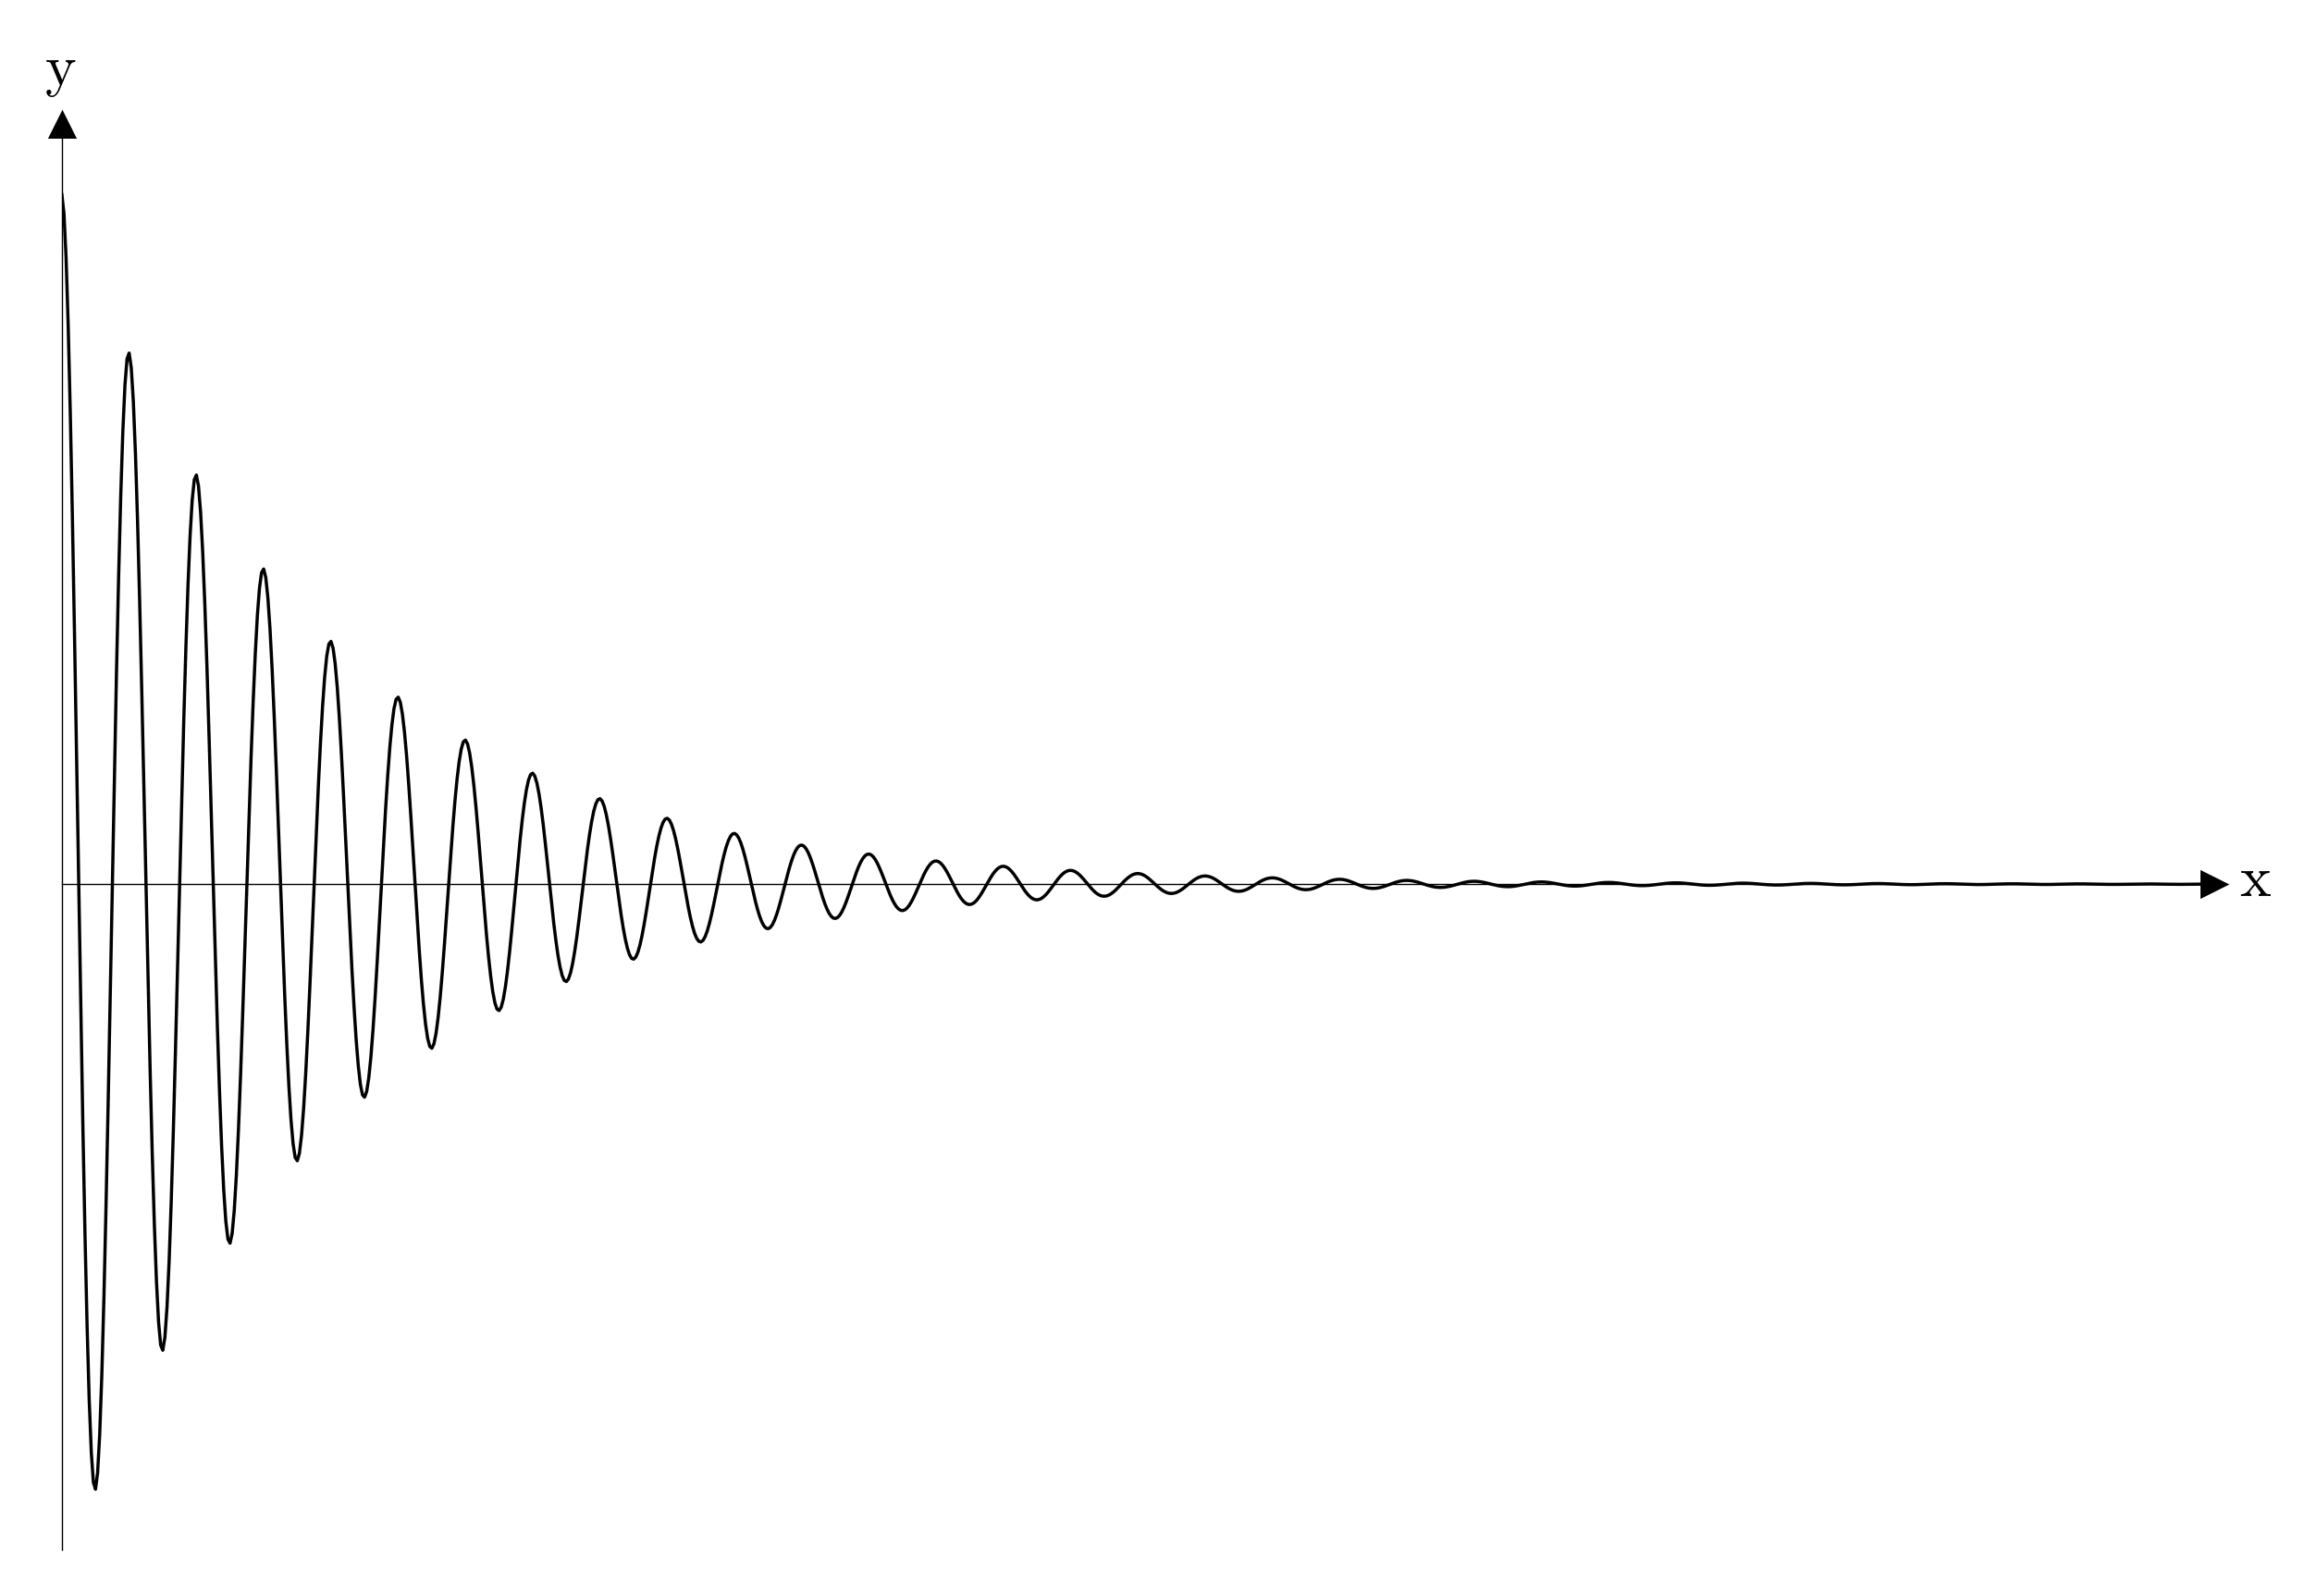

In [99]:
graph(x, y)

In [128]:
min(f)

-0.030655784532839445

In [129]:
s.SR/2

0.03065578453283944

In [130]:
f = scipy.fft.fftfreq(1024, dt)

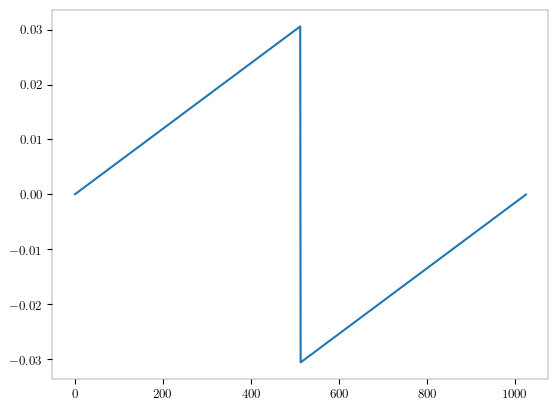

In [131]:
plt.plot(np.linspace(0, 1024, 1024), f)

In [155]:
%matplotlib widget

In [152]:
f1 = np.roll(f, 512)

In [153]:
Y1 = np.roll(Y, 512)

In [145]:
print(check)

None


In [139]:
f[511]

0.03059590995367374

In [158]:
s.SR

0.03065578453283944

In [156]:
plt.plot(f1, Y1.real)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [209]:
y = np.exp(2*np.pi*0.005j*s.t)*np.exp(-pow(s.t, 2)/pow(10, 7))

In [210]:
x = s.t

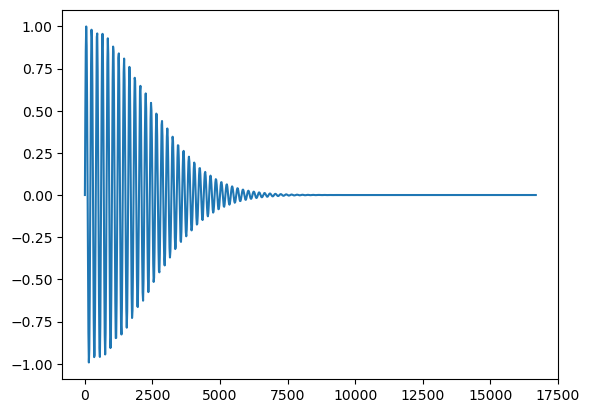

In [211]:
plt.plot(x, y.imag)
plt.show()

In [212]:
Y = scipy.fft.fft(y)

In [ ]:
f =scipy.fft.fftfreq()

In [217]:
x1 = np.roll(x, 512)

In [ ]:
x1

In [218]:
Y1 = np.roll(Y, 512)

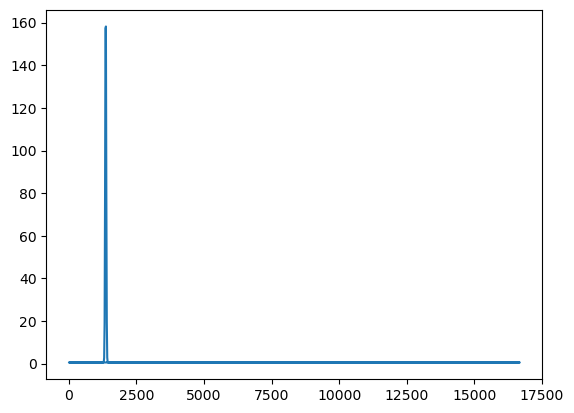

In [219]:
plt.plot(x1, Y1.real)
plt.show()